**Linear vs Polynomial Regression**

**Introduction: When and Why to Use Polynomial Regression**

Polynomial regression is used when the relationship between the independent variable (X) and the dependent variable (y) is non-linear. If a linear model underfits the data, polynomial regression may improve model accuracy by introducing higher-order terms.

**Polynomial Regression Formula**

**Visualizing Dummy Data**

**Dummy data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,13,28,55])

**Linear Regression**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred_linear = linear_model.predict(x)

**Polynomial Regression (degree 2)**

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly = poly_model.predict(x_poly)


**Plot**

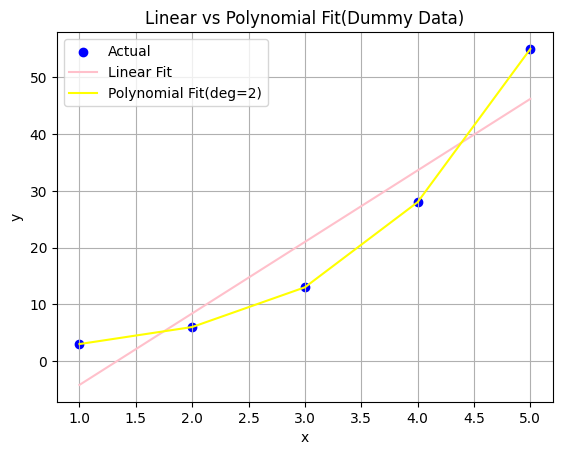

In [ ]:
plt.scatter(x,y,color='blue',label='Actual')
plt.plot(x,y_pred_linear,color='pink',label='Linear Fit')
plt.plot(x,y_pred_poly,color='yellow',label='Polynomial Fit(deg=2)')
plt.title("Linear vs Polynomial Fit(Dummy Data)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

**Real Dataset: Salary Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Load** **dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


**Train-test split**

In [ ]:
x = df[["Years of Experience"]]
y = df["Salary"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Train-test split**

**Train linear regression**

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
y_pred_lin = lin_model.predict(x_test)

**Metrics**

In [ ]:
mse_lin = mean_squared_error(y_test,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test,y_pred_lin)


print("Linear Regression Metrics:")
print("MSE: ",mse_lin)
print("RMSE:", rmse_lin)
print("R2 Score:", r2_lin)

Linear Regression Metrics:
MSE:  946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


**Polynomial Regression (Degrees 2 and 4)**

**Degree 2**

In [ ]:
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

poly2_model = LinearRegression()
poly2_model.fit(x_train_poly2,y_train)
y_pred_poly2 = poly2_model.predict(x_test_poly2)

**Metrics**

In [ ]:
mse_poly2 = mean_squared_error(y_test,y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_test,y_pred_poly2)

**Degree 4**

In [ ]:
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)

In [ ]:
poly4_model = LinearRegression()
poly4_model.fit(x_train_poly4,y_train)
y_pred_poly4 = poly4_model.predict(x_test_poly4)

**Metrics**

In [ ]:
mse_poly4 = mean_squared_error(y_test,y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test,y_pred_poly4)

print("\nPolynomial Regression (Degree 2):")
print("MSE:", mse_poly2)
print("RMSE:", rmse_poly2)
print("R2 Score:", r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("MSE:", mse_poly4)
print("RMSE:", rmse_poly4)
print("R2 Score:", r2_poly4)


Polynomial Regression (Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial Regression (Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


**Visualization of All Models**

Generate smooth line for predictions

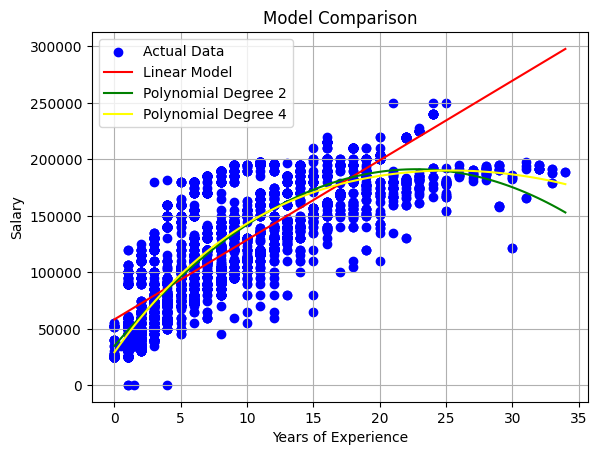

In [41]:
x_range = np.linspace(x.min(),x.max(),100).reshape(-1,1)

#Create DataFrame with column name
x_range_df = pd.DataFrame(x_range,columns=['Years of Experience'])

#Transform using polynomial features
x_range_poly2 = poly2.transform(x_range_df)
x_range_poly4 = poly4.transform(x_range_df)

#Predict using models
y_range_lin = lin_model.predict(x_range_df)
y_range_poly2 = poly2_model.predict(x_range_poly2)
y_range_poly4 = poly4_model.predict(x_range_poly4)

#Plot
plt.scatter(x,y,color='blue',label='Actual Data')
plt.plot(x_range,y_range_lin,color='red',label='Linear Model')
plt.plot(x_range,y_range_poly2,color='green',label='Polynomial Degree 2')
plt.plot(x_range,y_range_poly4,color='yellow',label='Polynomial Degree 4')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.show()



**Model Performance Comparison**

In [42]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Degree 2', 'Polynomial Degree 4'],
    'MSE': [mse_lin, mse_poly2, mse_poly4],
    'RMSE': [rmse_lin, rmse_poly2,rmse_poly4],
    'R2 Score': [r2_lin, r2_poly2, r2_poly4]
})

metrics_df.style.format({
    'MSE': '{:.2f}',
    'RMSE': '{:.2f}',
    'R2 Score': '{:.4f}'
})

,Model,MSE,RMSE,R2 Score
0,Linear Regression,946833177.71,30770.65,0.6670
1,Polynomial Degree 2,726857249.72,26960.29,0.7443
2,Polynomial Degree 4,720033651.69,26833.44,0.7467




**Final Notes**



*  Use polynomial regression if your linear model underfits the data.

*  Be cautious with high degrees — they may lead to overfitting.
*   Always evaluate on a test set with metrics like RMSE and R2 Score.

